# BANK MARKETING CAMPAIGNS ANALYSIS

## 1. GENERAL INFORMATION:
### 1.1. Project goal:
* This project is about analyzing bank marketing campaigns results. The main purpose of the analysis is identifying/predicting customers who will be able to place deposit after the marketing campaigns.
### 1.2. Main Tasks:
* Analyze marketing performance from different perspectives (age,
marital status, job, etc)
* Create effective marketing visualization with charts like line
graph, bar chart, ...
* Perform clustering using Random Forest algorithm
### 1.3. Setup Process:
* Loading dataset, performing Expanatory Data Analysis (EDA) and data cleaning (if required).
* Identifying metrics and performing clustering using "Random Forest algorithm".
* Providing conclusion and recommendations.
### 1.4. Dataset Information:
* The dataset describes bankmarketing campaigns results. These campaigns is conducted by direct phone calls, offering clients to place a term deposit.
* Data source: https://archive.ics.uci.edu/dataset/222/bank+marketing
### 1.5. Dataset Description:
* 1 - age (numeric)
* 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (categorical: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - balance: clients' balance (numeric)
* 7 - housing: has housing loan? (categorical: 'no','yes','unknown')
* 8 - loan: has personal loan? (categorical: 'no','yes','unknown')

***Related with the last contact of the current campaign:***
* 9 - contact: contact communication type (categorical: 'cellular','telephone')
* 10 - day: last contact day of month (numeric)
* 10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call 'y' is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

***other attributes:***
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

***Output variable (desired target):***
* 16 - deposit - has the client subscribed a term deposit? (binary: 'yes','no')

## 2. ANALYSIS STEPS:

## 2.1. Loading dataset

Firstly, let's run some important libraries to do the EDA process.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset:

In [2]:
df = pd.read_csv("bank.csv")
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Let's see number of rows and columns in the dataset

In [3]:
df.shape

(11162, 17)

See the data type and null counting of each column:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


=> The dataset looks fine

Let's try to count the blank value for each column:

In [5]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Some additional information for numeric columns:

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


=> The data set seems reasonable in terms of data type.
Data type "object" makes up more than 50% of the data set, so we will consider  them for machine learning model implementation in the following steps.

## 2.2. Performing EDA

In [7]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


First of all, let's see the effectiveness of marketing campaigns.

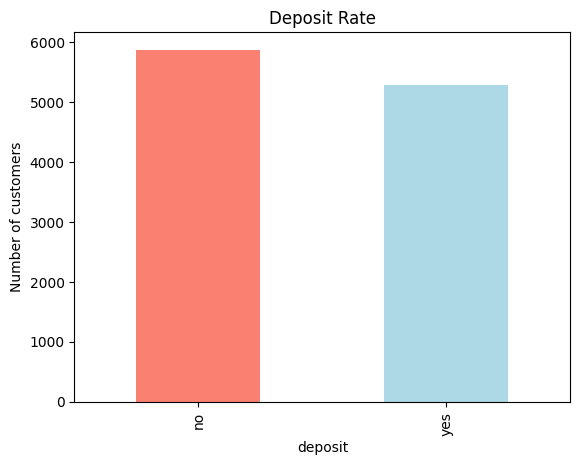

In [8]:
df['deposit'].value_counts().plot.bar(color=['salmon', 'lightblue'])
plt.ylabel('Number of customers')
plt.title('Deposit Rate')
plt.show()

We understand that the **effectiveness of marketing activities** depends on the number of people placing a term deposit, as shown in the column "deposit", with two values "yes" or "no".

### Let's look at this effect from different perspectives.

Firstly, let's calculate the total number of deposits

In [9]:
# Build a function to show categorical values distribution
def plt_bar(column):
    # temp df
    temp_df = pd.DataFrame()
    # Count categorical values
    temp_df['Has deposited'] = df[df['deposit'] == 'yes'][column].value_counts()
    temp_df['Not deposited'] = df[df['deposit'] == 'no'][column].value_counts()

    total_deposited = temp_df['Has deposited'].sum()
    total_not_deposited = temp_df['Not deposited'].sum()

    temp_df['Has deposited (%)'] = (temp_df['Has deposited'] / total_deposited) * 100
    temp_df['Not deposited (%)'] = (temp_df['Not deposited'] / total_not_deposited) * 100

    ax = temp_df[['Has deposited (%)', 'Not deposited (%)']].plot(kind='bar')

    # Add data labels to the bars
    for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}%',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
                    
    plt.xlabel('{}'.format(column))
    plt.ylabel('Percentage of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show()

Plot the result in bar charts:

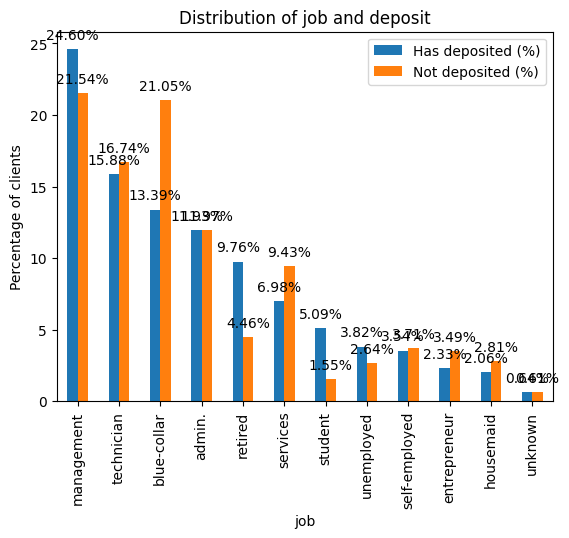

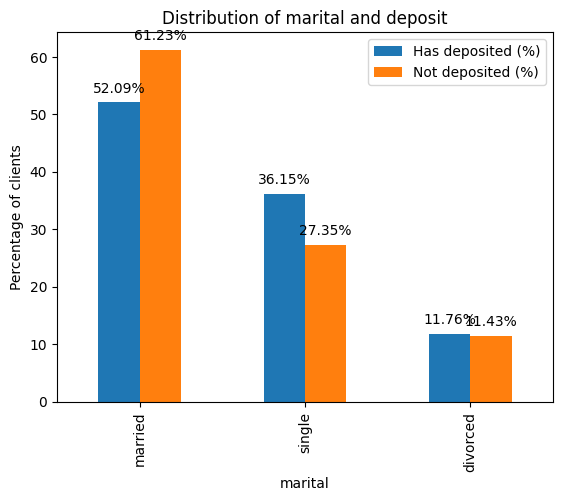

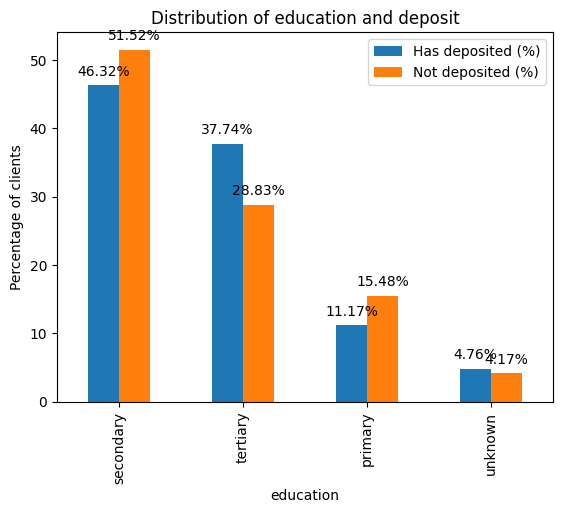

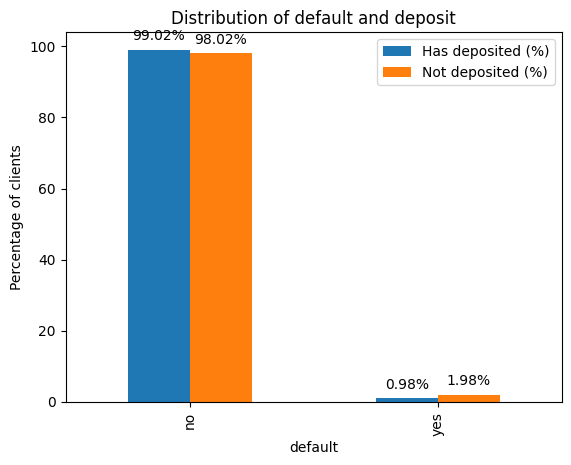

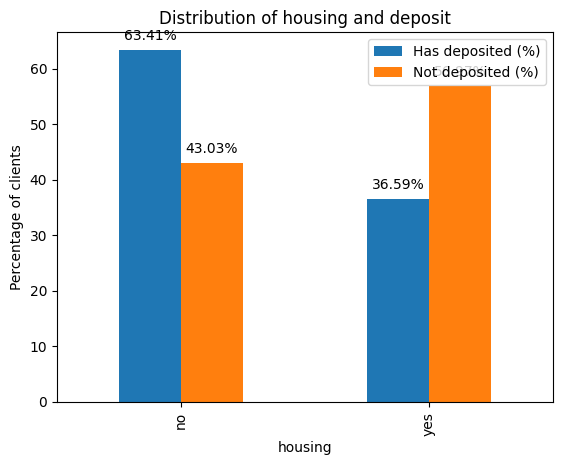

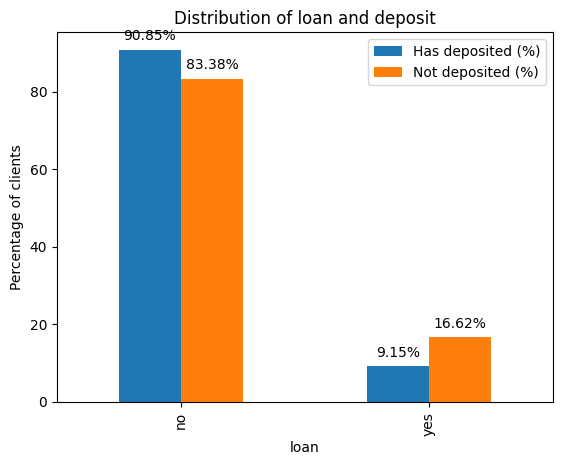

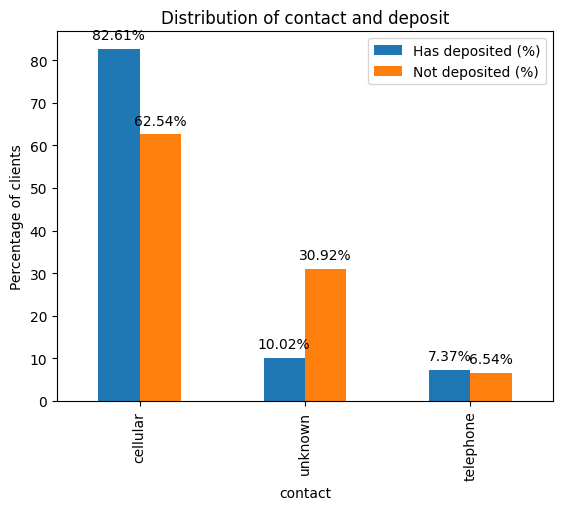

In [10]:
plt_bar('job'),
plt_bar('marital'),
plt_bar('education'),
plt_bar('default'),
plt_bar('housing'),
plt_bar('loan'),
plt_bar('contact')

**From the graphs above, I have a few conclusions as follows:**
1. Customers who defined as **'management', 'technical', 'admin'** open the most deposit accounts. Notably, although the number of offers is not much, the number of **retired** and **student** customers who placed a term deposit is quite impressive.
2. Althought the number of offers is less, the rate of opening a deposit account from **single** and **divorced** people perform better than the married one.
3. In terms of education, the rate of opening deposit accounts from **tertiary** customers is much higher than the rest of customers.
4. Customers who do **not have a house loan** are more likely to open a deposit account. This is quite reasonable.
5. **Cellular** is the best approach for deposit account opening marketing campaigns.

**With numerical data, we will build a Heatmap to see how the correlation is between them.**
### Let's see the correlation between features.


Let's normalize some category columns

In [11]:
# Normalize 'deposit' column by encoding it from 'object' to 'numeric'
# 'Yes' will correspond to '1' and 'No' will correspond to '2'.
category_mapping = {'yes': 1, 'no': 0}
df.deposit = df.deposit.map(category_mapping)

What does the table look like after normalization?

In [12]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


Let's see the correlation between features

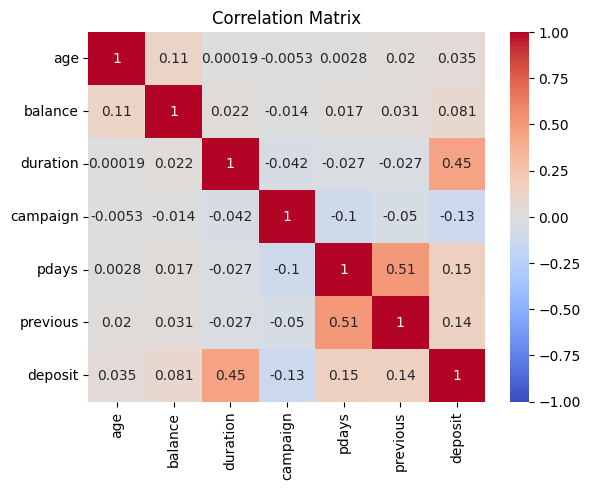

In [13]:
# Build correlation matrix
selected_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'deposit']
selected_df = df[selected_features]
corr_matrix = selected_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**From this correlation matrix, we can make some conclusions as follows:**
1. The **duration** of the call has a great influence on the customer's deposit investment decision. The longer the call duration, the more likely customers will open a deposit account.
2. The remaining factors are not highly correlated with campaign effectiveness, which can make it difficult to use machine learning models, we need to consider other factors to make predictions and conclusions more exactly.

OK, now I'm going use Machine Learning to see which features are important to focus on and also check if my consclusions are accurate or not.

## 2.3. Modeling

### Data Normalization

**First of all, let's normalize categorical data to get better performance for the model.**

Here is my strategy for data normalization:
* By assumption, **'duration'** is the most important feature, it will be transformed by using **Binning method**.
* Categorical values will be normalized by using **One Hot Endcoding method**.
* Values in age, balance, pdays, and campaign feature will be **rescaled** to their correponding natural logarithms.

In [14]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1


In [15]:
# Normalizing age feature using sklearn library
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.age = scaler.fit_transform(df[['age']])
df.balance = scaler.fit_transform(df[['balance']])
df.campaign = scaler.fit_transform(df[['campaign']])
df.pdays = scaler.fit_transform(df[['pdays']])
df.previous = scaler.fit_transform(df[['previous']])

# Convert Duration Call into 5 categories
# Calculate bin width
bin_width = (df.duration.max() - df.duration.min()) / 5
# Calculate bin edges
bin_edges = [df.duration.min() + i * bin_width for i in range(6)]
# Applying binning using pd.cut()
df.duration = pd.cut(df.duration, bins=bin_edges, labels=[1, 2, 3, 4, 5])


In [16]:
# Normalizing feature using One Hot Encoding method
df.dropna(inplace=True)
df_dummies = pd.get_dummies(df)


<Axes: >

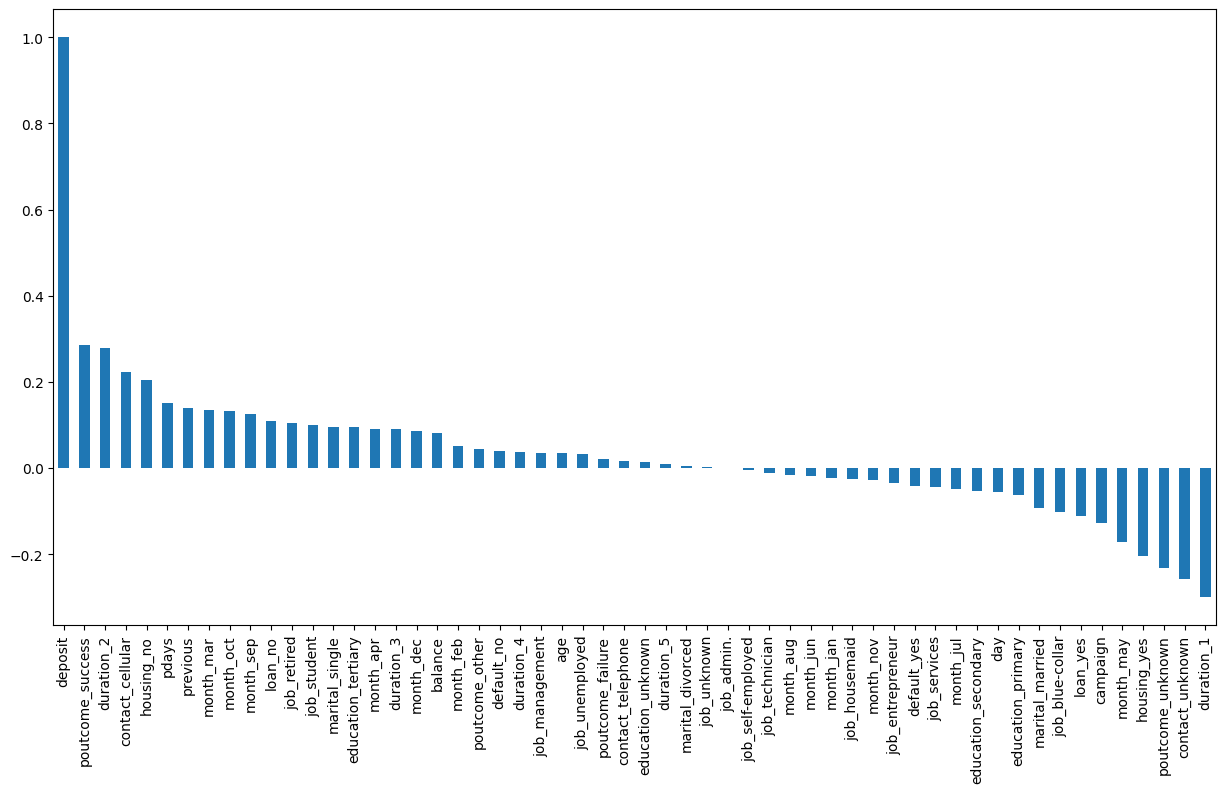

In [17]:
plt.figure(figsize=(15,8))
df_dummies.corr()['deposit'].sort_values(ascending = False).plot(kind='bar')

**Here is my observation about the graph:**
* poutcome_success, duration_2, contact_cellular, pdays features seem to be **positively correlated** with 'deposit'. 
* While duration_1, contact_unknown, poutcome_unknown, housing_yes feature seem to be **negatively correlated** with 'deposit'.

In [18]:
deposit = df_dummies.deposit
columns_to_drop = ['day', 'deposit']
df_dummies.drop(columns= columns_to_drop, inplace=True)

In [19]:
print(df_dummies.shape)
print(deposit.shape)

(11161, 54)
(11161,)


### Data Modeling

**Now, let's develop RandomForest predictive models and find out most important features.**

In [20]:
# Create Train and Test data
y = deposit.values
X = df_dummies.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=42, oob_score=True, n_jobs=-1, \
                           max_depth=25, min_samples_leaf=80, min_samples_split=3)

# Fit the model to the training data
rf_model.fit(X_train, y_train)
prediction_test = rf_model.predict(X_test)
acc = accuracy_score(y_test,prediction_test)*100
print("Random Forest accuracy:",acc)

Random Forest accuracy: 77.25033587102553


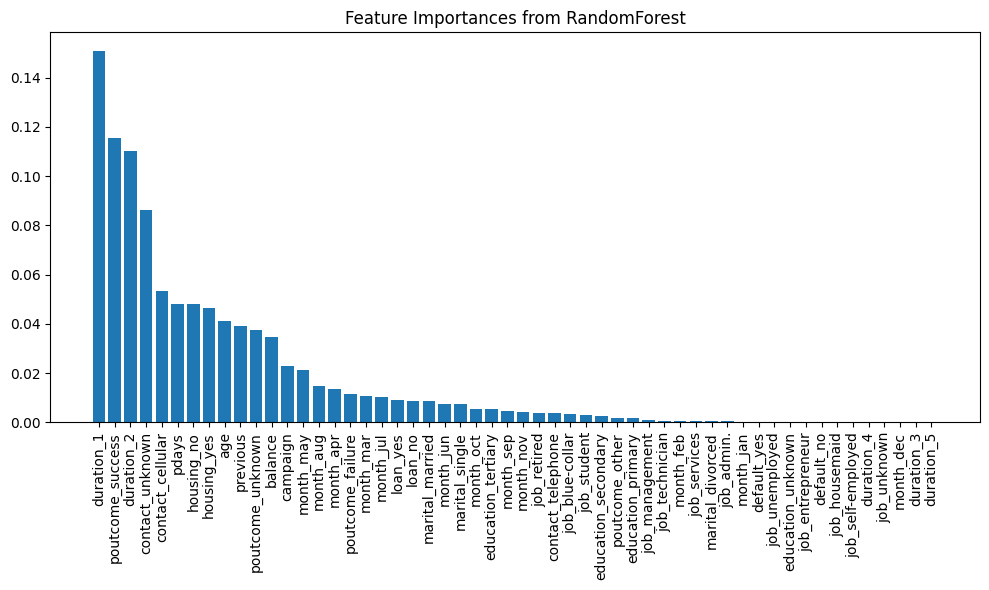

In [25]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Get feature names (column names)
feature_names = df_dummies.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[sorted_indices], rotation=90)
plt.title('Feature Importances from RandomForest')
plt.tight_layout()
plt.show()

## 3. CONCLUSIONS AND RECOMMENDATIONS

## Conclusions:
* Many features that really have large impact on the result of marketing campaigns such as **duration call, previous campaign outcomes, contact methods, and client's financial status.**
* This examination can be conducted at the granularity of individual bank branches, as it doesn't demand extensive resources or specialized expertise. The model can be automatically executed periodically. 
* Implementing such micro-targeting has the potential to enhance the overall efficiency of the entire marketing campaign.

## Recommendations:
* Extend the duration of customer interaction (possibly by rephrasing the company's objective). Alternative communication methods could be utilized.
* Focus on customers who have positive outcome from previous campaigns.
* Create target segment based on socio-economic or specific demographics attributes. Age, income, loan and job can precisely define the potential client's marketing profile.

By directing the bank's efforts, resources can be efficiently allocated to the primary factor—bank-client contact time—which significantly impacts conversion rates.